In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
%matplotlib inline


# 1. Data Inspection


In [2]:
# Load the dataset
from pathlib import Path

file_path = Path(r"C:\Users\User\Desktop\UNIVELCITY\May 28\Xente Fraud Detection\dataset.csv")

In [5]:
file_path

WindowsPath('C:/Users/User/Desktop/UNIVELCITY/May 28/Xente Fraud Detection/dataset.csv')

In [7]:
df = pd.read_csv(file_path, low_memory=False)

In [9]:
df.shape

(95662, 16)

In [11]:
print("Data Head:\n", df.head())
print("\nData Info:\n", df.info())
print("\nData Description:\n", df.describe())

Data Head:
          TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  Tran

# 2. Data Cleaning
# a. Handling missing values, duplicates, and inconsistencies in the data


In [13]:
df.duplicated().sum()

0

In [15]:
df.isna().sum().sum()

0

In [17]:
df = df.dropna()  # Drop rows with missing values
df = df.drop_duplicates()  # Remove duplicate rows

In [19]:
df[df.select_dtypes(['float','int']).columns.tolist()].drop(['CountryCode','Amount'],axis = 1)

,Value,PricingStrategy,FraudResult
0,1000,2,0
1,20,2,0
2,500,2,0
3,21800,2,0
4,644,2,0
...,...,...,...
95657,1000,2,0
95658,1000,2,0
95659,20,2,0
95660,3000,2,0


In [21]:
df[df.select_dtypes(['float','int']).columns.tolist()].drop(['CountryCode','Amount'],axis = 1).corr()

,Value,PricingStrategy,FraudResult
Value,1.000000,-0.017020,0.566739
PricingStrategy,-0.017020,1.000000,-0.033821
FraudResult,0.566739,-0.033821,1.000000


In [23]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


<Axes: >

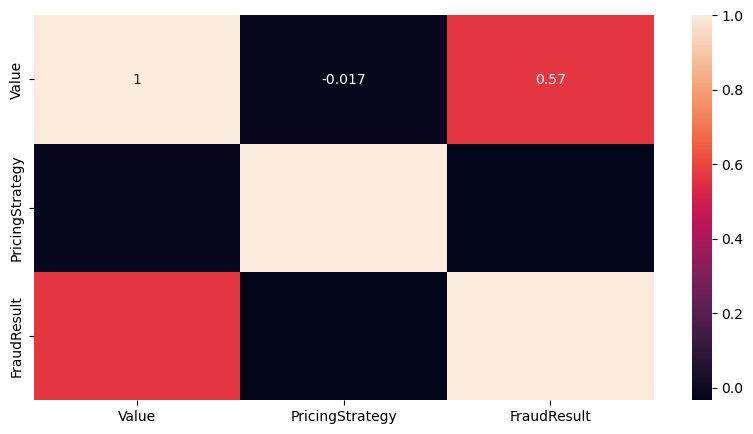

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.heatmap(df[df.select_dtypes(['float','int']).columns.tolist()].drop(['CountryCode','Amount'],axis = 1).corr(),annot = True)

# 3. Exploratory Data Analysis (EDA)
# a. Visual and statistical analysis to understand data distributions and relationships


In [ ]:
sns.histplot(df['FraudResult'], kde=True)
plt.title('Distribution of FraudResult')
plt.show()

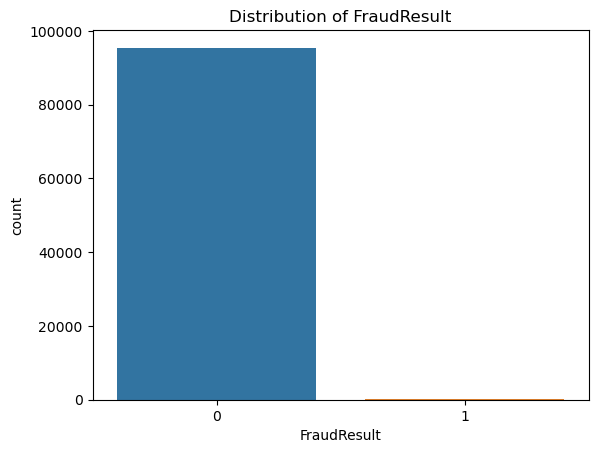

In [137]:
sns.countplot(x='FraudResult', data=df)
plt.title('Distribution of FraudResult')
plt.show()

# Check correlations


Text(0, 0.5, 'Fraud Count')

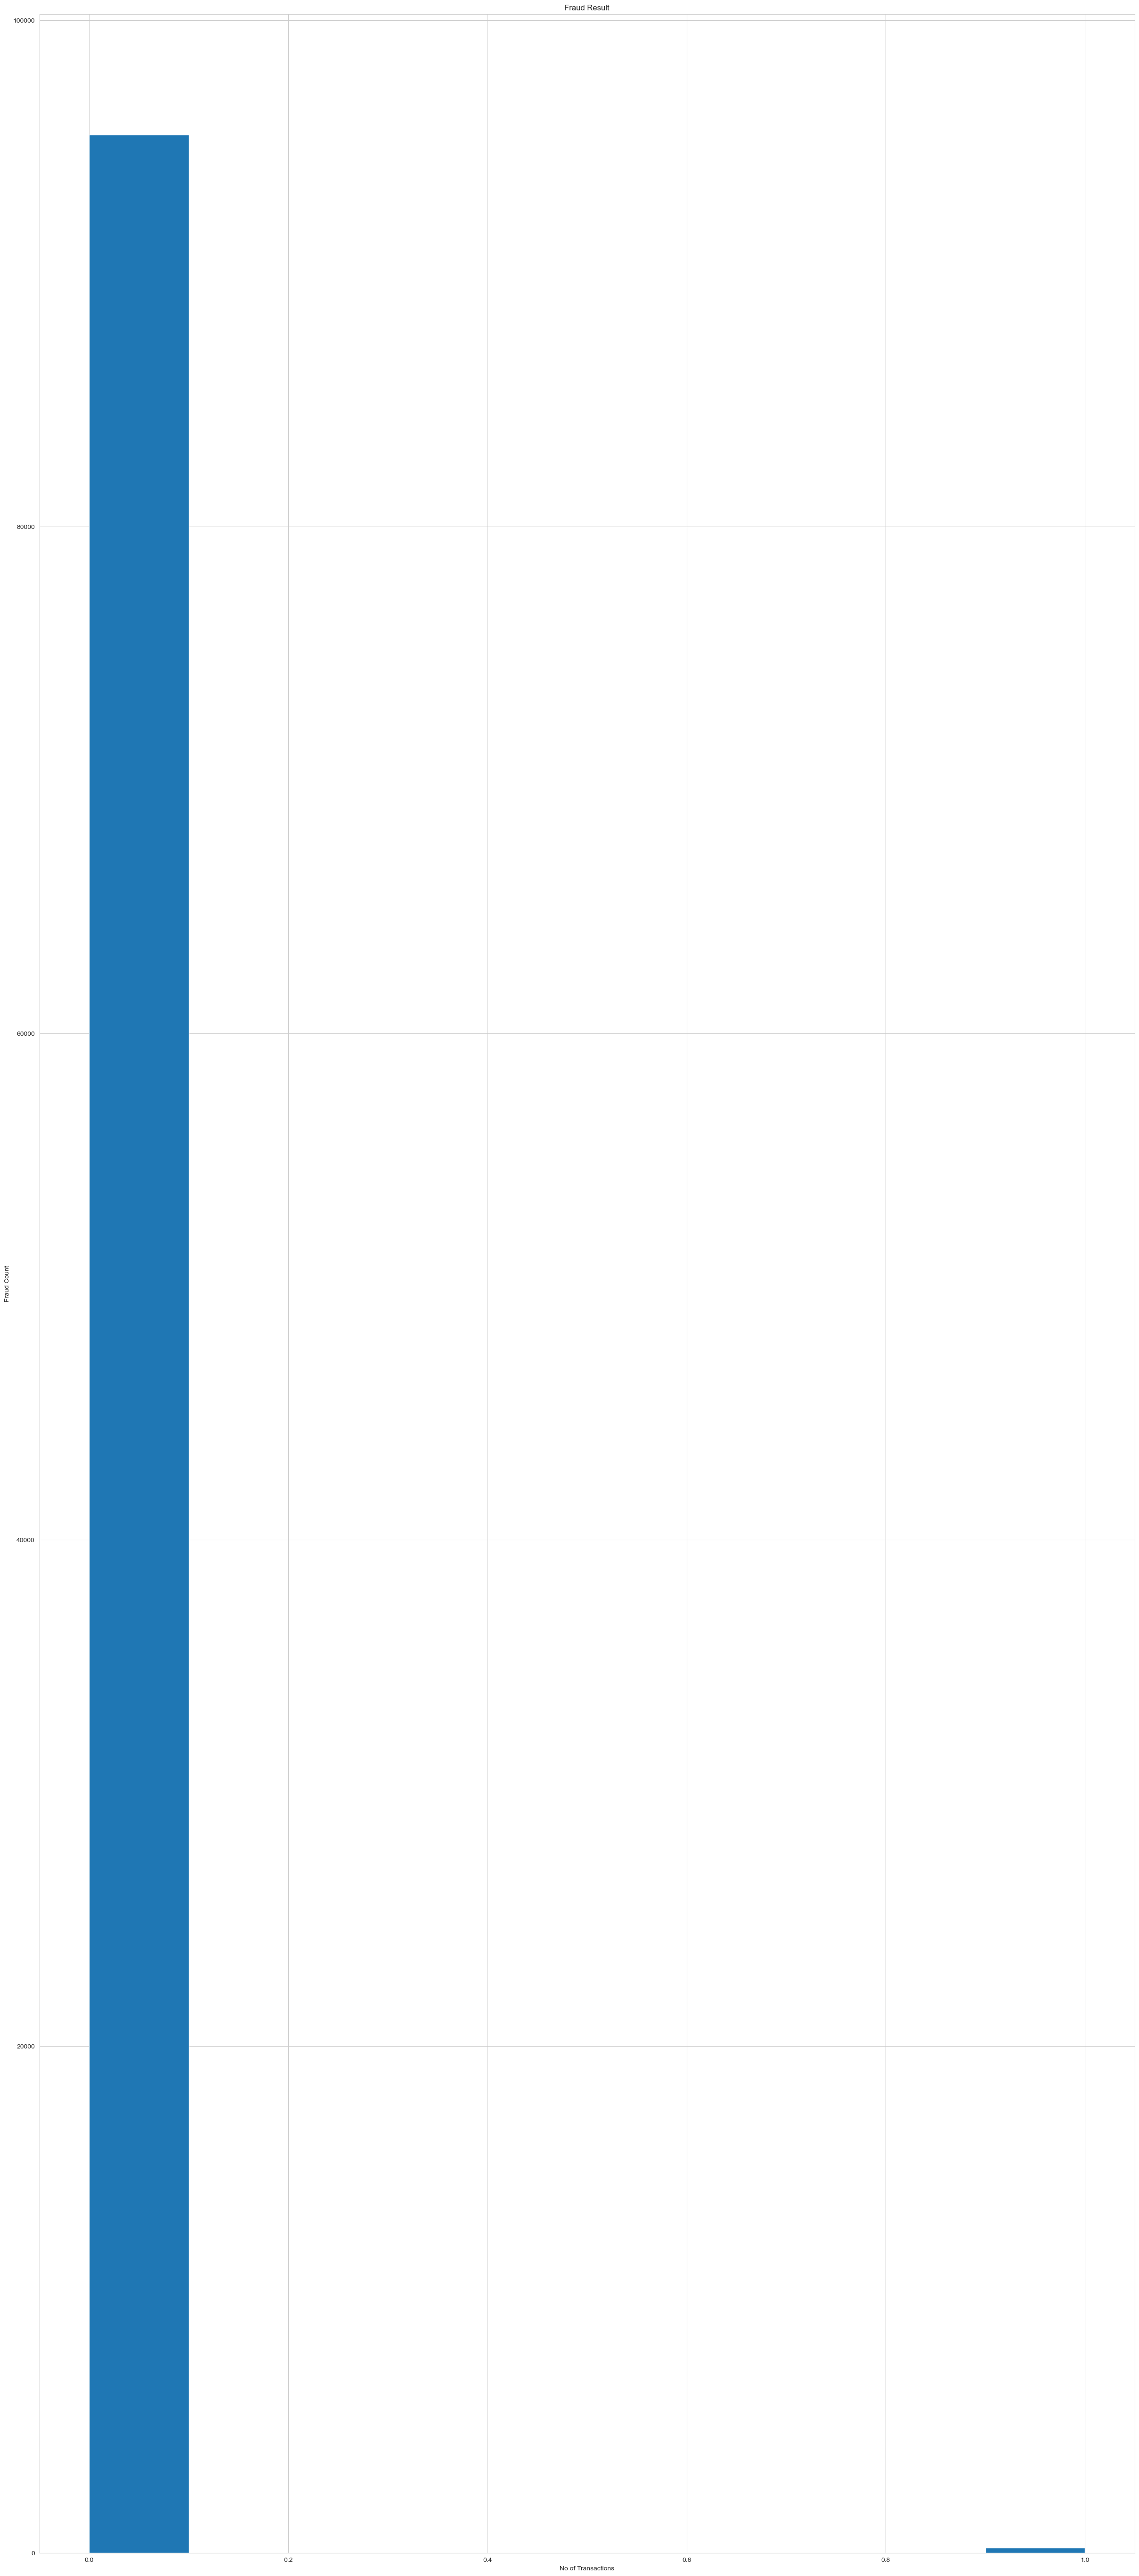

In [41]:
#Exploratory Data Analysis (EDA):
plt.figure(figsize=(30,70))
sns.set_style(style = 'whitegrid')
plt.title('Fraud Result')
plt.hist(df.FraudResult)
plt.xlabel('No of Transactions')
plt.ylabel('Fraud Count')

In [31]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns=['ChannelId']), df['FraudResult'], 

    test_size=0.2,
    random_state=42
)

Text(0, 0.5, 'Fraud Count')

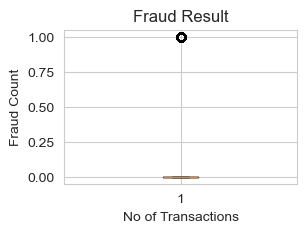

In [43]:
plt.figure(figsize=(3,2))
plt.title('Fraud Result')
plt.boxplot(df.FraudResult)
plt.xlabel('No of Transactions')
plt.ylabel('Fraud Count')

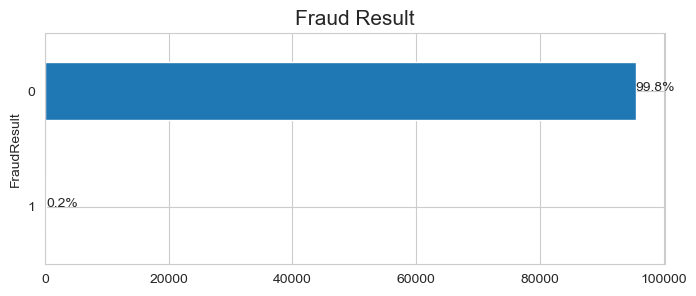

In [49]:
#To do a horizontal barchart
ax = df['FraudResult'].value_counts().sort_values().plot(kind = 'barh', figsize=(8,3))
plt.title('Fraud Result', fontdict={'size': 15})
for p in ax.patches:
    percentage = '{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x=p.get_x()+width+0.2
    y=p.get_y()+height/2
    ax.annotate(percentage, (x,y))

In [51]:
#To do a value count of 0s and 1s
df['FraudResult'].value_counts()

FraudResult
0    95469
1      193
Name: count, dtype: int64

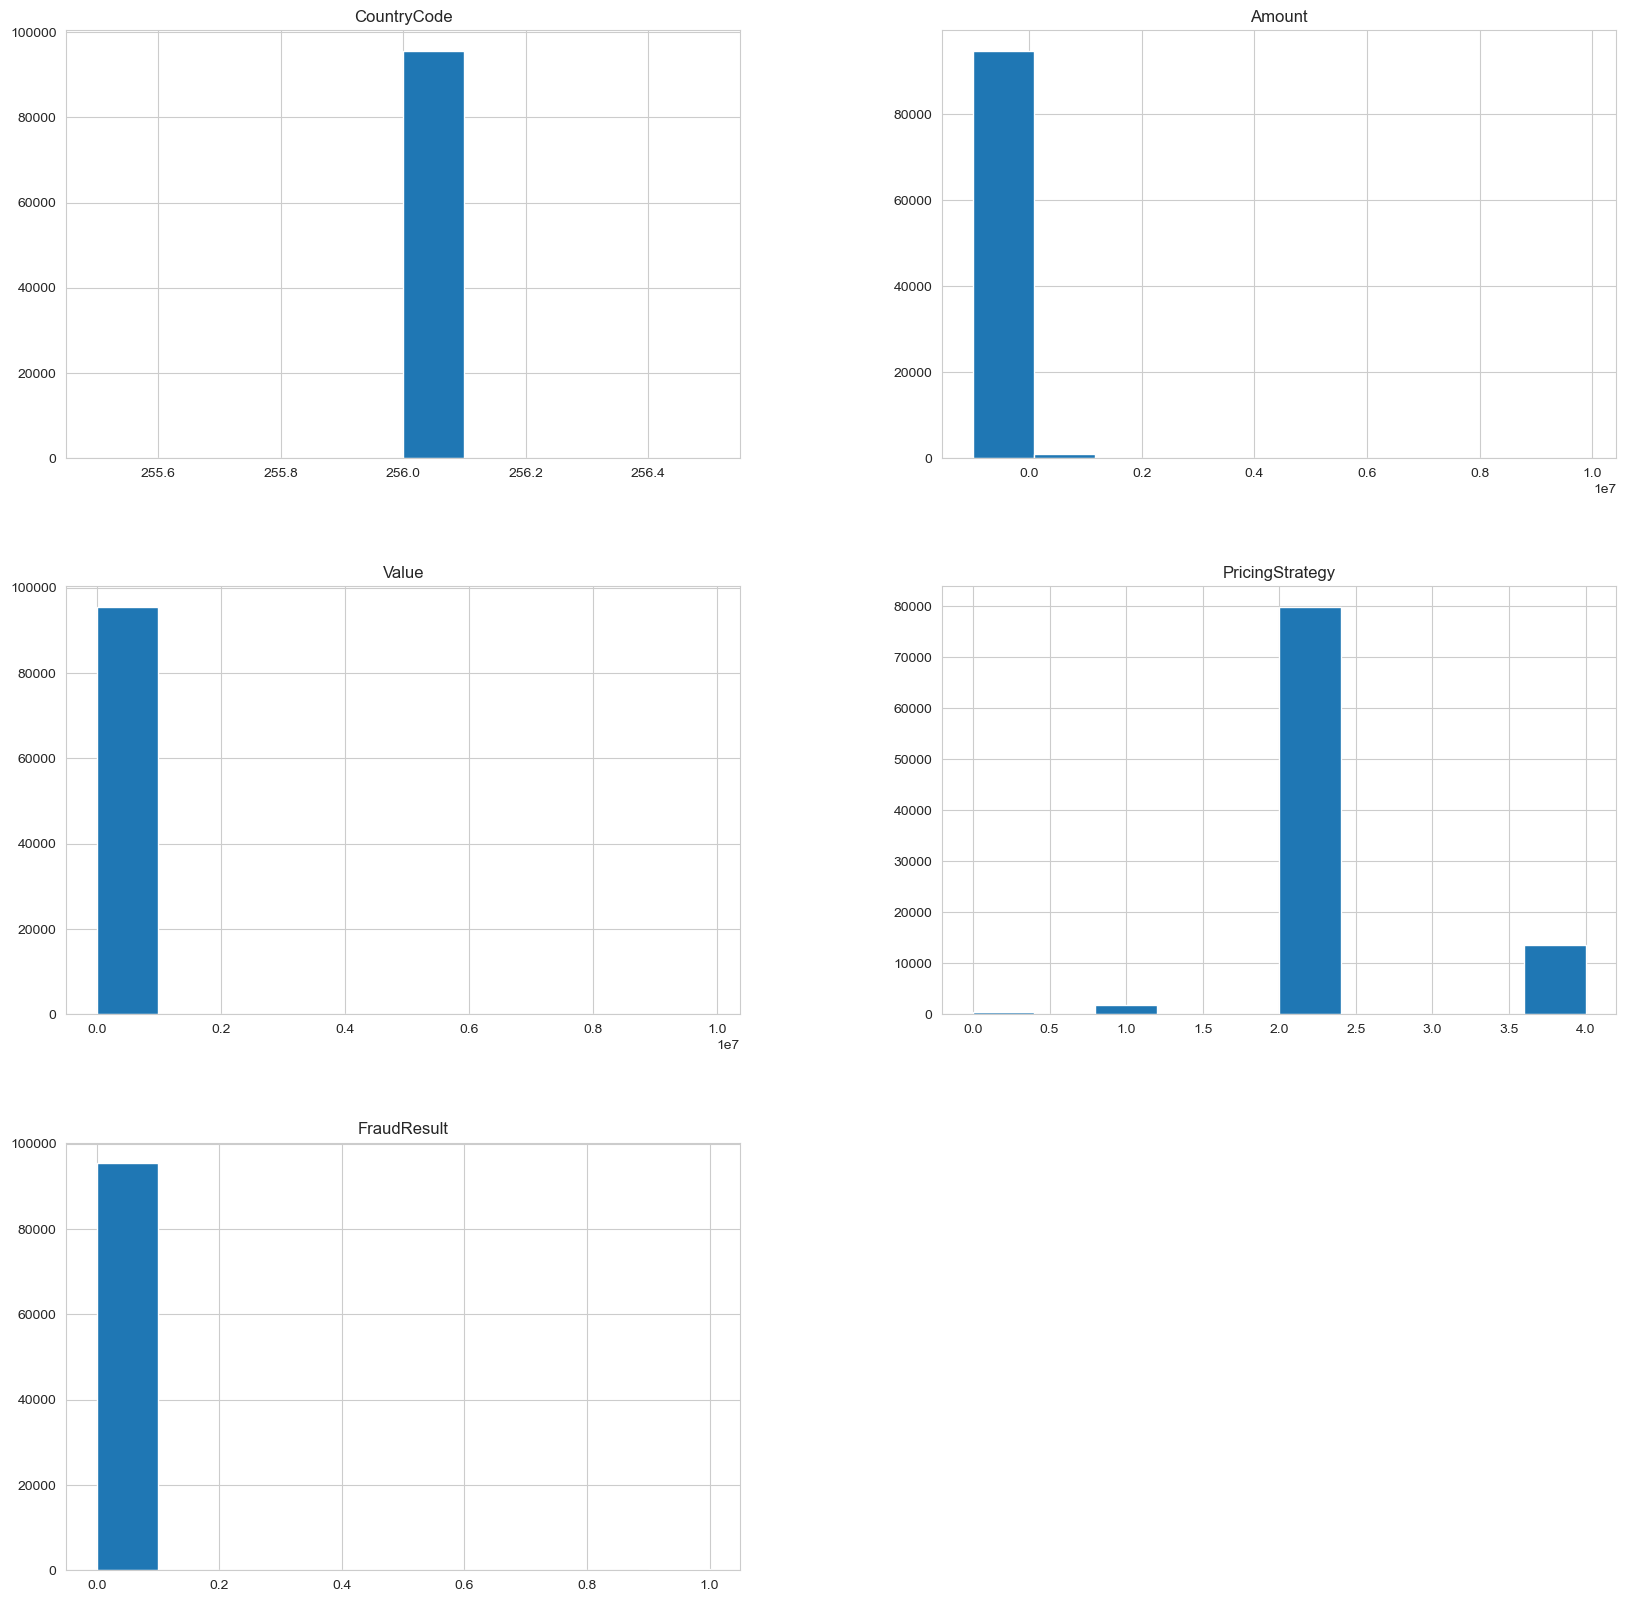

In [55]:
df.hist(figsize=(20,20))
plt.show()

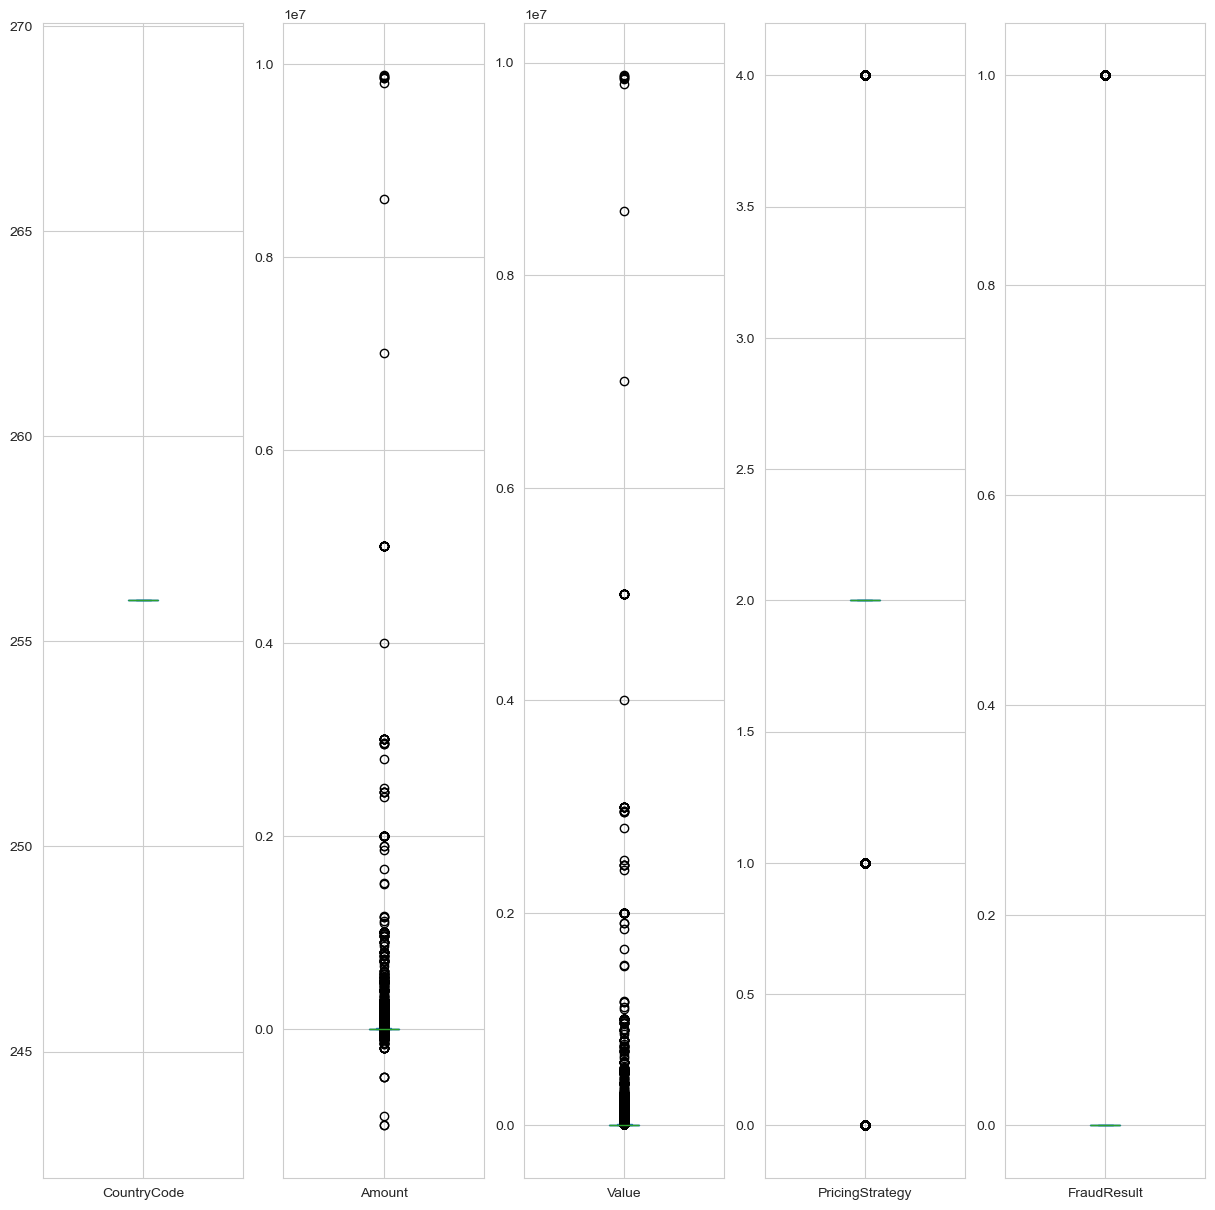

In [57]:
df.plot(kind='box', figsize=(15,15), subplots=True, sharex=False, sharey=False)
plt.show()

In [67]:
#Subsetting dataset variables into their various data type
date=['TransactionStartTime']
num=['Amount', 'Value', 'CountryCode', 'PricingStrategy']
cat=[col for col in df.columns
    if col not in date + num + ['FraudResult']]

In [84]:
incon2=['CountryCode', 'Amount', 'Value',
       'PricingStrategy']
incon2

['CountryCode', 'Amount', 'Value', 'PricingStrategy']

['CountryCode', 'Amount', 'Value', 'PricingStrategy']

In [75]:
#Onehotencoding
df2 = pd.get_dummies(data=df, columns=[col for col in Incon2], dtype='int' , drop_first=True)
df2.head()


NameError: name 'Incon2' is not defined

Initialize and model training

# Feature Engineering: Encode categorical variables